# ADA final exam (Fall 2021)

This exam consists of 2 parts.
The first part has 3 tasks.
The second part has 2 tasks.
The two parts are completely independent of each other.

## Important: The data used for this exam **is not entirely real.** A great deal of it has been artificially created or modified. Conclusions drawn from this data have no real link to reality!

In [312]:
%matplotlib inline

# General
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For graph-related stuff
import networkx as nx

# For regression analyses and statistical tests
import scipy.stats as stats
import statsmodels.stats
import statsmodels.formula.api as smf

# For classification
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## Part 1 — Faculty hiring network

For the first part of the exam, you will analyze data from a faculty hiring network. After completing their Ph.D., researchers who want to pursue an academic career must compete for relatively few permanent positions (as “faculty”, i.e., professors) in a highly competitive job market. You will analyze a directed graph that captures the dynamics of this hiring process in the United States:


- Each node $u$ in this graph represents a different American university.
- For each university, we also provide a score that captures how highly  this university is ranked (e.g., Stanford University is ranked more highly than the University of Alabama). The higher the score, the more highly ranked the university.
- Each directed edge $(u,v)$ in this graph represents a hiring decision where someone who did their Ph.D. at university $u$ subsequently was hired by university $v$. Each edge is also associated with a gender label, which specifies if the person hired was a man (M) or a woman (F).
- Note that, when multiple researchers were trained at a given university $u$ and subsequently hired by university $v$, there will be multiple edges pointing from $u$ to $v$, each of which corresponds to a different person.


## Files (in the `./data/part-1/` folder)

- `nodelist.tsv` a tab-separated file containing the nodes of the graph. Recall that each node represents a different university. The file has these columns:
    - `u` — the node index;
    - `score` — the rank of the university (the higher the better);
    - `name` — the name of the university.

- `edgelist.tsv` a tab-separated file containing the edges of the graph. Recall that each edge represents a hiring decision. The file has columns:
    - `u` — the source university, where the person got their Ph.D.;
    - `v` — the target university, where the person was hired;
    - `gender` — the gender of the person.


### Task 1 — (20 points)

1. Using the above files, create the directed graph representing the hiring network using `networkx`.
Each node should contain the attributes `score` and `name`, and each edge should contain the attribute `gender`.
Print the total numbers of nodes and edges in the graph.

2. Create a plot that allows you to easily visualize **(a)** what fraction of all researchers in the graph are hired by the $N$ universities that hire the most; and  **(b)** what fraction of all researchers in the graph are trained by the $N$ universities whose students get hired the most.
Here, $N$ could be any number between 1 and the number of universities.

3. **/Multiple choice:/** Which centrality metric(s) is/are illustrated in the plot you made for the previous subtask? Select all that apply from the list below and **justify your answer.**
    1. Betweenness centrality
    2. In-degree centrality
    3. Out-degree centrality
    4. PageRank centrality

4. **/True or false:/** Search engines such as Google have historically used PageRank centrality as a signal to determine the importance of pages on the Web. Is the following statement **true** or **false**? Justify. **"In the faculty hiring network, PageRank centrality is positively correlated with university score, that is, universities with higher scores are more likely to also have higher PageRank centrality."**


***
1. Using the above files, create the directed graph representing the hiring network using `networkx`.
Each node should contain the attributes `score` and `name`, and each edge should contain the attribute `gender`.
Print the total numbers of nodes and edges in the graph.

In [313]:
#import data
nodes = pd.read_table("./data/part-1/nodelist.tsv")
edges = pd.read_table("./data/part-1/edgelist.tsv")

In [314]:
#display nodes
nodes.sample(5)

,u,score,name
168,169,16.461730,Michigan Technological University
36,37,79.708575,Georgia Tech
181,182,9.977791,Long Island University
198,199,3.087590,"University of Arkansas, Little Rock"
126,127,30.772981,University of Regina


In [315]:
#read edges
edges.sample(5)

,u,v,gender
2858,37,52,F
1284,11,2,M
2060,21,80,M
1585,13,84,F
1188,9,47,M


In [316]:
#check for NaN values
print("ant NaN values in nodes ? ", nodes.isnull().values.any())
print("ant NaN values in nodes ? ", edges.isnull().values.any())

ant NaN values in nodes ?  False
ant NaN values in nodes ?  False


In [317]:
# since the unis are unique, index based on uni ID
nodes.set_index('u', inplace=True)
nodes.sample(5)

,score,name
u,,
18,90.677645,"University of Texas, Austin"
133,28.552083,"University of Maryland, Baltimore County"
203,2.367152,"University of Nevada, Reno"
104,41.525378,"State University of New York, Albany"
137,26.732030,New Mexico State University


In [318]:
uniG = nx.from_pandas_edgelist(edges, 
                               source='u',
                               target='v',
                               create_using=nx.MultiDiGraph(),
                               edge_attr=['gender'])

nx.set_node_attributes(uniG, nodes['score'].to_dict(), 'score')
nx.set_node_attributes(uniG, nodes['name'].to_dict(), 'name')

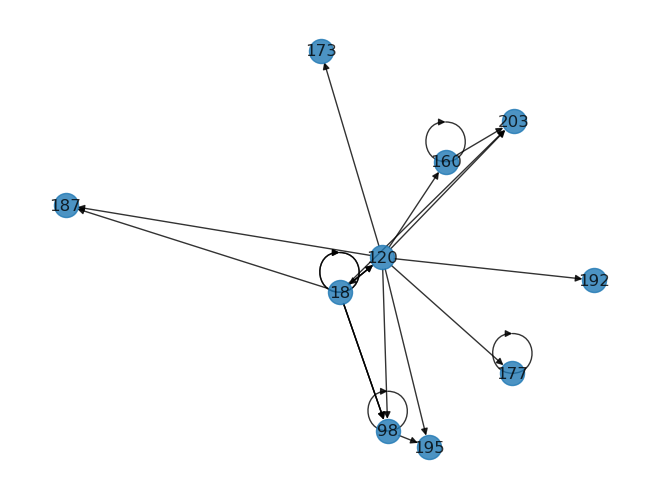

In [319]:
# Plots a sub network (universirty 120: University of Texas, Dallas)
subG = uniG.subgraph([120]+list(uniG.neighbors(120)))
nx.draw_spring(subG, with_labels=True, alpha=0.8)

In [320]:
#check with the edges df
edges[edges['u']==120]

,u,v,gender
4133,120,18,M
4134,120,98,F
4135,120,160,M
4136,120,173,F
4137,120,177,M
4138,120,187,F
4139,120,192,F
4140,120,195,M
4141,120,203,F


In [321]:
#check the attributes of the node
uniG.nodes[120]

{'score': 33.02637993608147, 'name': 'University of Texas, Dallas'}

In [322]:
#get the total number of nodes and edges
print("Number of edges:", uniG.number_of_edges())
print("Number of nodes:", uniG.number_of_nodes())

#plot the length of the dfs
print("Length of edges df:", len(edges))
print("Length of nodes df:", len(nodes))

Number of edges: 4388
Number of nodes: 205
Length of edges df: 4388
Length of nodes df: 205


***
2. Create a plot that allows you to easily visualize **(a)** what fraction of all researchers in the graph are hired by the $N$ universities that hire the most; and  **(b)** what fraction of all researchers in the graph are trained by the $N$ universities whose students get hired the most.
Here, $N$ could be any number between 1 and the number of universities.

The most hiring unis are: [7, 37, 3, 55, 28, 21, 191, 111, 1, 6, 11, 27, 10, 26, 2, 18, 35, 25, 102, 80, 88, 74, 106, 57, 12, 32, 46, 20, 15, 42, 36, 120, 87, 40, 66, 175, 41, 50, 54, 52, 31, 151, 38, 160, 13, 70, 51, 8, 49, 181, 75, 56, 23, 29, 95, 98, 143, 72, 65, 91, 69, 128, 139, 145, 148, 193, 189, 16, 67, 85, 34, 129, 99, 108, 43, 118, 94, 22, 155, 60, 107, 30, 167, 131, 19, 84, 126, 90, 133, 140, 100, 9, 44, 163, 5, 124, 125, 81, 115, 153, 200, 93, 205, 166, 105, 89, 17, 53, 113, 123, 130, 77, 204, 14, 73, 112, 117, 116, 86, 82, 188, 61, 173, 152, 33, 45, 142, 201, 83, 24, 190, 169, 103, 172, 154, 192, 64, 96, 48, 197, 178, 146, 183, 47, 109, 59, 194, 186, 104, 97, 176, 196, 4, 161, 141, 63, 62, 198, 203, 71, 92, 110, 138, 78, 79, 174, 39, 101, 195, 179, 132, 147, 76, 177, 164, 127, 187, 150, 199, 184, 170, 165, 156, 171, 137]
The most training unis are: [3, 2, 1, 7, 11, 21, 6, 35, 18, 12, 13, 8, 25, 27, 10, 37, 5, 41, 55, 15, 28, 36, 19, 23, 46, 9, 40, 20, 31, 14, 29, 4, 26, 32

C:\Users\pujol\AppData\Local\Temp/ipykernel_84860/1471933205.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return serie.value_counts()[:N].index.tolist()
C:\Users\pujol\AppData\Local\Temp/ipykernel_84860/1471933205.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return serie.value_counts()[:N].index.tolist()
C:\Users\pujol\AppData\Local\Temp/ipykernel_84860/1471933205.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

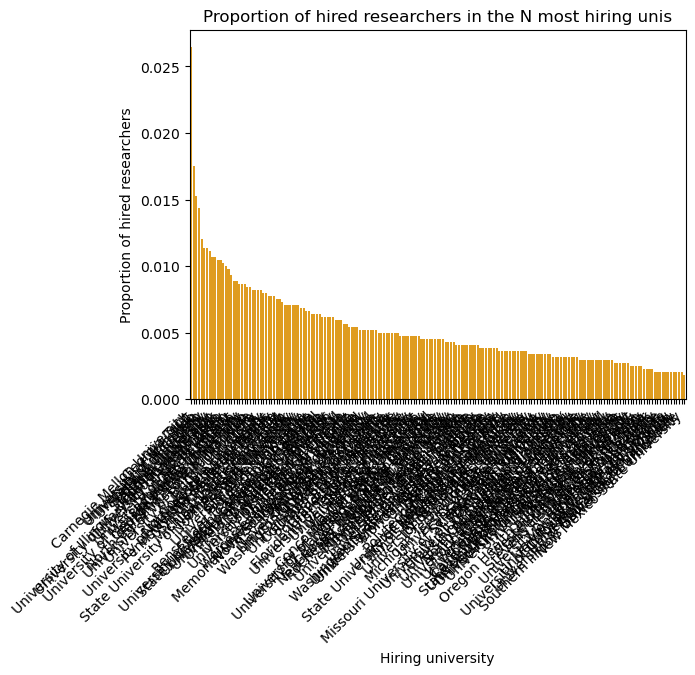

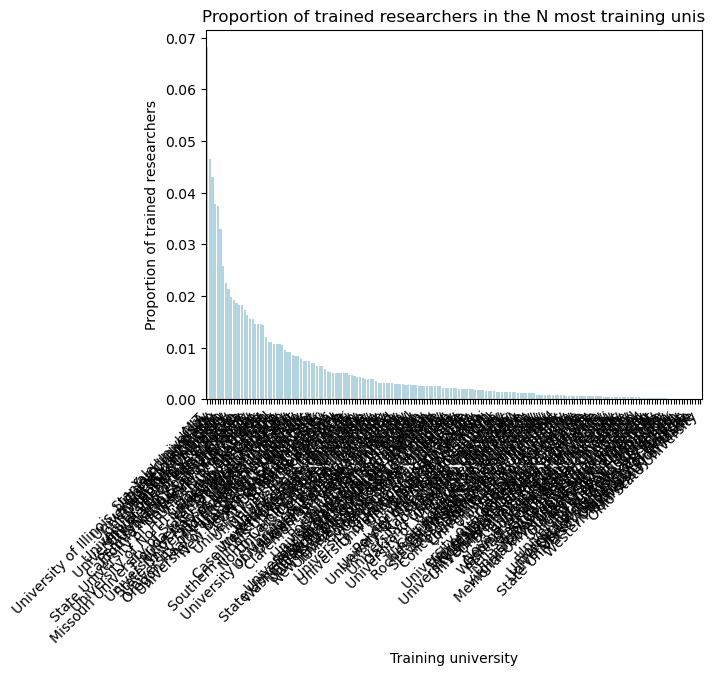

In [323]:
#helper funtion
def get_most_frequent_values(serie, N):
    return serie.value_counts()[:N].index.tolist()

#define N
N = 185

#get most hiring/trining unis
hire_ids = get_most_frequent_values(edges['v'], N)
train_ids = get_most_frequent_values(edges['u'], N)

#print results
print("The most hiring unis are:", hire_ids)
print("The most training unis are:", train_ids)

#get df from these ids
hire_nodes = nodes[nodes.index.isin(hire_ids)]
train_nodes = nodes[nodes.index.isin(train_ids)]

#number of students hired by a uni
n_hired = []
for uni in hire_nodes.index:
    n_hired.append(len(edges[edges['v']==uni]))
hire_nodes['n_hired'] = n_hired
hire_nodes['p_hired'] = hire_nodes['n_hired']/len(edges)
hire_nodes.sort_values(by='n_hired', ascending=False, inplace=True)

#number of students trained by a uni
n_trained = []
for uni in hire_nodes.index:
    n_trained.append(len(edges[edges['u']==uni]))
train_nodes['n_trained'] = n_trained
train_nodes['p_trained'] = train_nodes['n_trained']/len(edges)
train_nodes.sort_values(by='n_trained', ascending=False, inplace=True)

#plot hiring unis
sns.barplot(x='name', y="p_hired", data=hire_nodes, color='orange')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Hiring university")
plt.ylabel("Proportion of hired researchers")
plt.title("Proportion of hired researchers in the N most hiring unis")
plt.show()

#plot training unis
sns.barplot(x='name', y="p_trained", data=train_nodes, color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Training university")
plt.ylabel("Proportion of trained researchers")
plt.title("Proportion of trained researchers in the N most training unis")
plt.show()

***
3. **/Multiple choice:/** Which centrality metric(s) is/are illustrated in the plot you made for the previous subtask? Select all that apply from the list below and **justify your answer.**
    1. Betweenness centrality
    2. In-degree centrality
    3. Out-degree centrality
    4. PageRank centrality

For the hiring unis, we illustrated the **in degree** of the graph. Each university has a in degree, which is the number of incoming edges to the node. We looked for the most hiring unis and computed the number of time the uni receives a new researcher.

For the training unis, we illustrated the **out degree** of the graph. Each university has a out degree, which is the number of outgoing edges from the node. We looked for the most training unis and computed the number of time the a researcher leaves the uni.


***
4. **/True or false:/** Search engines such as Google have historically used PageRank centrality as a signal to determine the importance of pages on the Web. Is the following statement **true** or **false**? Justify. **"In the faculty hiring network, PageRank centrality is positively correlated with university score, that is, universities with higher scores are more likely to also have higher PageRank centrality."**

A uni **pagerank** centrality is high if many of its researchers come from other unis with a high pagerank centrality. The university score represents its capacity to train students to become researcher. A higher score will resuluts in more researchers. Thus, a good uni, as MIT, will have a lot of outgoing edges from its node, resulting in lowering its pagerank. Thus, pagerank centrality is not **positively** correlated to the university score.

***

### Task 2 — (15 points)

Each hiring decision $(u,v)$ connects two different universities with different scores.

1. Divide the universities into quintiles according to their scores ($Q_1$ to $Q_5$, where $Q_5$ contains the highest-ranked universities, i.e., those with the highest scores). Create a succinct plot that captures, for each pair of quintiles ($Q_i$, $Q_j$), what fraction of people in the dataset who got their Ph.D. from a university in $Q_i$ were hired by a university in $Q_j$.


2. **/Multiple choice:/** What does the plot made in the previous subtask reveal about the faculty hiring process? Select one of the following options and justify your answer.
    1. Ph.D. graduates who are hired as professors usually go to universities that are better than the universities where they were trained.
    2. Ph.D. graduates who are hired as professors usually go to universities that are around the same or worse than the universities where they were trained.

3. **/True or false:/** Let $E$ be the set of edges from the hiring network, and let $X$ be defined as follows:
$$X = \frac{|(u,v) \in E : u \in Q_1 \text{ and } v \in Q_5 |}{{|(u,v) \in E : u \in Q_1|}}$$
 *Thinking critically about the data that was given to you,* is the following statement **true** or **false**? Justify your answer. **"If I get my Ph.D. in a 1st-quintile university, I have a chance of around X * 100%  of getting a job in a 5th-quintile university."**


---
**Hints:**
- [pandas.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) makes splitting data into quantiles easy!


***
1. Divide the universities into quintiles according to their scores ($Q_1$ to $Q_5$, where $Q_5$ contains the highest-ranked universities, i.e., those with the highest scores). Create a succinct plot that captures, for each pair of quintiles ($Q_i$, $Q_j$), what fraction of people in the dataset who got their Ph.D. from a university in $Q_i$ were hired by a university in $Q_j$.

In [324]:
#define a quantile for each node
nodes['quantile'] = pd.qcut(nodes['score'], 5, labels=['Q1','Q2','Q3','Q4','Q5'])

In [325]:
#add quantile attributes to the edge dataframe
edges = pd.merge(edges, nodes[['quantile']], left_on='u', right_index=True).rename(columns={"quantile":"quantile_u"})
edges = pd.merge(edges, nodes[['quantile']], left_on='v', right_index=True).rename(columns={"quantile":"quantile_v"})

In [326]:
edges

,u,v,gender,quantile_u,quantile_v
0,1,1,F,Q5,Q5
1,1,1,F,Q5,Q5
2,1,1,F,Q5,Q5
3,1,1,M,Q5,Q5
4,1,1,M,Q5,Q5
...,...,...,...,...,...
4230,139,172,M,Q2,Q1
4231,139,172,M,Q2,Q1
4330,172,172,M,Q1,Q1
4331,172,172,F,Q1,Q1


quantile_v,Q1,Q2,Q3,Q4,Q5
quantile_u,,,,,
Q1,0.863014,0.068493,0.054795,0.000000,0.013699
Q2,0.381250,0.425000,0.100000,0.068750,0.025000
Q3,0.340720,0.240997,0.296399,0.096953,0.024931
Q4,0.188627,0.201110,0.266297,0.266297,0.077670
Q5,0.068988,0.099577,0.160430,0.221608,0.449398


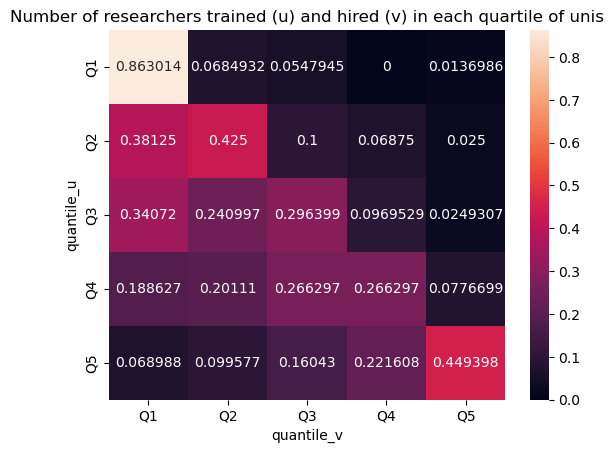

In [330]:
#plot a heatmap with quantile of training vs. hiring unis
edges_heatmap = pd.crosstab(edges['quantile_u'], edges['quantile_v'], normalize='index')
sns.heatmap(edges_heatmap, annot=True, fmt='g')
plt.title("Number of researchers trained (u) and hired (v) in each quartile of unis")

edges_heatmap

***
2. **/Multiple choice:/** What does the plot made in the previous subtask reveal about the faculty hiring process? Select one of the following options and justify your answer.
    1. Ph.D. graduates who are hired as professors usually go to universities that are better than the universities where they were trained.
    2. Ph.D. graduates who are hired as professors usually go to universities that are around the same or worse than the universities where they were trained.

Thanks to the heatmap we see that very few researchers graduating from a uni will be hired by a uni with a higher score. For example, a researcher graduated from a uni in Q2 (`quantile_u`) will have higher chances to be hired by a uni in Q1 or Q2 (`quantile_v`) than by a uni in Q3, Q4 or Q5. The upper part of the heatmap is darker than the lower part.

### Task 3 — (25 points)

Let the "source university" of a person be the university at which the person got their Ph.D., and let their "target university" be the university at which they were hired after their Ph.D.


1. For each hiring decision $(u, v)$, let the score gain ($d$) be defined as the difference between the scores of the target university and the source university (target university score minus source university score; see hint for example). Calculate the average difference for men ($\bar{d_{M}}$) and for women ($\bar{d_{F}}$) in the dataset. Determine whether the difference between these two averages ($\bar{d_{M}}$ and $\bar{d_{F}}$) is statistically significant.

2. **/True or false:/** Is the following statement **true** or **false**? Justify your answer. **"The results you obtained in Task 3.1 do not refute the hypothesis that women are disadvantaged in the faculty hiring process."**

3. For each quintile $Q$ from Task 2.1, calculate the following: **(a)** the percentage of women among hiring decisions $(u, v)$ with $u \in Q$ ; and **b)** the average score gain for hiring decisions $(u, v)$ with $u \in Q$.

4. **/Discuss:/** Considering the results obtained in Task 3.3, why is comparing the average score gain for men ($\bar{d_{M}}$) and women ($\bar{d_{F}}$) insufficient for determining the causal effect of gender on score gain?

5. Use `statsmodels` to run a linear regression where hiring decisions (edges of the hiring network) are the data points, gender and source-university score are the predictors, and score gain is the outcome. Report the summary of your model.

6. **/True or false:/** Considering the following statement, answer **true** or **false** and justify your answer. **"The results you obtained in Task 3.5 suggest that academic hiring decisions are unfair to women."**

---
**Hint** — The university with the best score is Stanford University (score 100), and the university with the 10th best score is the University of Washington (score 95.26). If someone was trained at Stanford and then got a job at the University of Washington, their score gain is $95.26 - 100 = -4.74$.

***
1. For each hiring decision $(u, v)$, let the score gain ($d$) be defined as the difference between the scores of the target university and the source university (target university score minus source university score; see hint for example). Calculate the average difference for men ($\bar{d_{M}}$) and for women ($\bar{d_{F}}$) in the dataset. Determine whether the difference between these two averages ($\bar{d_{M}}$ and $\bar{d_{F}}$) is statistically significant.

In [282]:
#assign the uni score to each edges
edges = pd.merge(edges, nodes[['score']], left_on='u', right_index=True).rename(columns={"score":"score_u"})
edges = pd.merge(edges, nodes[['score']], left_on='v', right_index=True).rename(columns={"score":"score_v"})

#compute the score gain
edges['score_gain'] = edges['score_v'] - edges['score_u']

In [283]:
#cut the edge df in male and female
edgesM = edges[edges.gender == 'M']
edgesF = edges[edges.gender == 'F']

#compute the means of gain scores
mean_score_gain_M = edgesM['score_gain'].mean()
mean_score_gain_F = edgesF['score_gain'].mean()

#print means
print("Avarage score gain for a male researcher:", mean_score_gain_M)
print("Avarage score gain for a female researcher:", mean_score_gain_F)

#get the p-value to determine if the difference is significative or not
print("The p-value of the two sets is", stats.ttest_ind(edgesM.score_gain, edgesF.score_gain).pvalue)


Avarage score gain for a male researcher: -23.25517053445935
Avarage score gain for a female researcher: -25.20198837639484
The p-value of the two sets is 0.0121188684668312


To a significance level of alpha = 5%, the difference in the university score gain is statistically significant between men and women researchers. We also note that the means are negative, correlating the statements in previous tasks, saying that a researcher will have more chance to be hired by a university with a lower score.

***
2. **/True or false:/** Is the following statement **true** or **false**? Justify your answer. **"The results you obtained in Task 3.1 do not refute the hypothesis that women are disadvantaged in the faculty hiring process."**

True. Because the t-test cannot prove that the two distributions (male score gain and female score gain) are be generated by the same law to a significance level of alpha = 5%, we cannot refute the hypothesis that women are disadvantaged in the faculty hiring process.

***

3. For each quintile $Q$ from Task 2.1, calculate the following: **(a)** the percentage of women among hiring decisions $(u, v)$ with $u \in Q$ ; and **b)** the average score gain for hiring decisions $(u, v)$ with $u \in Q$.

In [284]:
#create a quantil dataframe with proportions of male and female
quant = pd.DataFrame()
quant['quantile_u'] = ['Q1','Q2','Q3','Q4','Q5']

#compute the proportion of women in each training quantile
quant['p_female'] = quant['quantile_u'].apply(lambda x: len(edgesF[edgesF['quantile_u']==x])/len(edges[edges['quantile_u']==x]))

#same for men
# quant['p_male'] = quant['quantile_u'].apply(lambda x: len(edgesM[edgesM['quantile_u']==x])/len(edges[edges['quantile_u']==x]))

#compute the mean score gain for each training quantile
quant['mean_score_gain'] = quant['quantile_u'].apply(lambda x: edges[edges['quantile_u']==x]['score_gain'].mean())

#display the dataframe
quant

,quantile_u,p_female,mean_score_gain
0,Q1,0.109589,2.215927
1,Q2,0.200000,-1.689948
2,Q3,0.299169,-14.244373
3,Q4,0.402219,-23.425257
4,Q5,0.511227,-27.274451


***
4. **/Discuss:/** Considering the results obtained in Task 3.3, why is comparing the average score gain for men ($\bar{d_{M}}$) and women ($\bar{d_{F}}$) insufficient for determining the causal effect of gender on score gain?

In task 3.3, we did not look at the proportion of women in each quantile. To be more precise with our comparaison, we should compare the gain score between women and men in each uni. For example, we see there is much more men than women in the first quantile, the only one with a positive score gain. This positivness will impact more the mean score gain for men than for women. This can lead to the simpson paradoxe if the values are pushed even more to the extremes.

***
5. Use `statsmodels` to run a linear regression where hiring decisions (edges of the hiring network) are the data points, gender and source-university score are the predictors, and score gain is the outcome. Report the summary of your model.

In [285]:
#first, convert the gender column : 1 if woman, 0 if man
edges['gender'] = (edges['gender']=='F').astype(int)

In [286]:
# Declare the model
mod = smf.ols(formula='score_gain ~ gender + score_u', data=edges)

# Fit the model (finds the optimal coefficients)
res = mod.fit()

# Print the summary output
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_gain   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     112.4
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           2.48e-48
Time:                        15:38:15   Log-Likelihood:                -20347.
No. Observations:                4388   AIC:                         4.070e+04
Df Residuals:                    4385   BIC:                         4.072e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4502      1.435     -2.404      0.0

***

6. **/True or false:/** Considering the following statement, answer **true** or **false** and justify your answer. **"The results you obtained in Task 3.5 suggest that academic hiring decisions are unfair to women."**

First, we see that lower is the university_u score, lower is the score gain, as seen in 3.3. Researchers from lower quantiled universites will have a even lower score gain. The intercept representing men, we see that a random male researcher will have a score gain of -3.45 - 0.2613 * score_u. On the other hand, a random female researcher will hhave a score gain of -3.45 + 0.15 - 0.2613 * score_u. This shows that a female researcher will have a better score gain that a male rsearcher from the same uni.

## Part 2 — Tennis interviews

For the second part of the exam, you will work with text data extracted from questions asked during post-match tennis interviews and from
TV commentary done during the tennis match.


Examples of interview questions:

> That last set seemed like a faultless performance. Is that the way you saw it?

> How disappointing is that loss for you?

> As a spectator, would you rather watch a guy with big aces or a match with lots of rallies?

Example of commentary text:

>  Serena is desperate to shake herself into action. She lets out an almighty shriek when she goes 30-15 up, but Azarenka responds with a brilliant forehand. The level of Williams' scream goes up and up during the next point, and she lets out another roar when she belts a forehand cross court win the point. She wraps the game up next time round, and she looked something like back to her best there!


## Files (in the `data` folder)

- `questions.tsv.gz` a tab-separated compressed file containing interview questions
and some metadata. We refer to this dataset as the "questions dataset."
Each row contains a question made to a specific player after a match.
The file has the following columns:
    - `questions` — the text of the question asked; **Note that you will never be asked to use this row; it is merely meant to help you understand the data better**.
    - `gender` — the gender of the player;
    - `ranking` — the ranking of the player at the time;
    - `similarity` — this column will be explained later in the exam.

- `commentary.tsv.gz` a tab-separated compressed file containing TV commentary done during
the tennis match. We refer to this dataset as the "commentary dataset." Each line contains
a piece of commentary done in a tennis match.
The file has the following columns:
    - `commentary` — the text of the commentary; **Note that you will never be asked to use this row; it is merely meant to help you understand the data better**.
    - `gender` — the gender of the players in the match;

- `TFIDF.npz`, a file containing 2D numpy arrays saved in the `.npz` format that
will be used in Task 4.

Both datasets are **balanced regarding gender,** i.e., they have the same number of rows about men as about women.


Commentary text, as well as interview questions, have been preprocessed to make your life easier, as follows:

- We replaced all words starting with upper-case letters with the special string `'--ENT--'`. This was done to remove personal names (e.g., Alice, Bob), which could help predict whether the text is associated with a male or a female tennis player.
- We removed the first word in each sentence. This was done because, for the first word of each sentence, it is difficult to know whether it is a personal name or simply a regular word.
- We replaced all gendered pronouns in the text (he/him/his and she/her/hers) with the special string `'--PRON--'`. This, too, was done because these words would make it easy to predict whether the text is associated with a male or a female tennis player.
- We removed punctuation and stop words (to reduce the dimensionality of the data).

The above example commentary text thus appears as follows in the data provided to you:

> desperate shake action lets almighty shriek --PRON-- goes 30 15 --ENT-- responds brilliant forehand level --ENT-- scream goes point --PRON-- lets roar --PRON-- belts forehand cross court win point wraps game time round --PRON-- looked like --PRON-- best

We also provide some code for loading and displaying the dataset:

In [287]:
#  Part 2 ! PROVIDED CODE !

questions = pd.read_csv("./data/part-2/questions.tsv.gz", sep="\t", compression="infer")
commentary = pd.read_csv("./data/part-2/commentary.tsv.gz", sep="\t", compression="infer")


In [288]:
#show questions df
questions.sample(5)

,questions,ranking,similarity,gender
1936,fever gone feel fit,906,0.808398,M
877,change match choices second set tiebreak,368,0.280040,F
882,viewing parties having --ENT--,130,0.519710,F
2474,changed --PRON-- shirt times --ENT-- limited r...,149,0.899639,M
2887,--ENT-- borrow wax,319,0.262375,M


In [289]:
#show questions df
commentary.sample(5)

,commentary,gender
1769,service --ENT-- takes control mixed bag shots ...,F
2857,30 30 --ENT-- goes drop shot drops early fails...,F
488,gets rally --ENT-- going long wins opening gam...,M
478,--ENT-- cruises unanswered game wraps second s...,M
2264,opening points shared --ENT-- blasts backhand ...,F


### Task 4  (20 points)

Your goal now is to investigate whether there is gender bias in the questions being asked to female vs. male players, i.e., whether men vs. women are asked different questions on average. You start your analysis with a classification framing.


To make your life easier, we already provided a TF-IDF matrix for each dataset (`commentary.tsv.gz` and `questions.tsv.gz`) and with code to load these matrices (which are numpy arrays).

- Each row in each matrix $M$ corresponds to a row in the corresponding dataframe, i.e., each row corresponds to a different question or a different piece of TV commentary.
- Each column in each matrix corresponds to a different word from the vocabulary.
- Each position $(i,j)$ in the matrix contains the TF-IDF score for word $j$ from the vocabulary in question or commentary $i$. That is, each term $M[i,j]$ corresponds to the term frequency (TF) of word $j$ in text $i$, multiplied by the inverse document frequency (IDF) of word $j$:


$$M[i,j] = \text{TF}(i,j) * \text{IDF}(j)$$


1. **/Multiple Choice:/** Which of the following is the correct way to calculate the term frequency and the inverse document frequency? Justify your answer, explaining what each of the two components should capture.
    - Option A:

    $$\text{TF}(i,j) = \text{number of times the $j$-th word occurs in all documents} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents the $j$-th word occurs in}}{\text{number of documents}}$$

    - Option B:

    $$ \text{TF}(i,j) = \text{number of times the $j$-th word occurs in the $i$-th document} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents the $j$-th word occurs in}}{\text{number of documents}}$$

    - Option C:

    $$ \text{TF}(i,j) = \text{number of times the $j$-th word occurs in all documents} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents}}{\text{number of documents the $j$-th word occurs in}}$$

    - Option D:

    $$ \text{TF}(i,j) = \text{number of times the $j$-th word occurs in the $i$-th document} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents}}{\text{number of documents the $j$-th word occurs in}}$$



2. Leveraging the matrices described above, train two logistic regression classifiers (one for interview questions, the other for TV commentary) that use the TF-IDF vectors as features to predict the gender of the athletes. You should split each dataset into training and test sets using sklearn (see [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) using parameters `test_size=0.4` and `random_state=42`. You should use sklearn's logistic regression model (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)) using parameters `C=10` (which controls regularization) and `max_iter=2000`. For each dataset, train the model on the training set (with 60% of the data) and report the accuracy on the test set (with 40% of the data).

3. **/True or false:/** Considering the following statement, answer **true** or **false** and justify your answer. **"Based on the outcome of Task 4.2, the text from tennis commentary text is more gender-biased than post-match questions."**

4. The parameter `C` above controls a regularization penalty. The lower `C`, the stronger the regularization penalty (caveat: sklearn’s convention is the reverse of the convention you saw in class, where a *higher* $\lambda$ parameter meant a stronger regularization penalty ). For the questions dataset, re-run the classification task using the same setup as in Task 4.2, but now with `C=2000`. Report the accuracy.

5. **/Discuss:/** Explain why increasing `C` changed the results.


In [290]:
# 4.2 ! PROVIDED CODE !
tmp = np.load("./data/part-2/TFIDF.npz")
TFIDF_commentary = tmp['commentary']
TFIDF_questions = tmp['questions']

TFIDF_questions

array([[0.60373585, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.19567434],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.13978562, ..., 0.        , 0.        ,
        0.        ],
       [0.59027928, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

***
1. **/Multiple Choice:/** Which of the following is the correct way to calculate the term frequency and the inverse document frequency? Justify your answer, explaining what each of the two components should capture.
    - Option A:

    $$\text{TF}(i,j) = \text{number of times the $j$-th word occurs in all documents} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents the $j$-th word occurs in}}{\text{number of documents}}$$

    - Option B:

    $$ \text{TF}(i,j) = \text{number of times the $j$-th word occurs in the $i$-th document} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents the $j$-th word occurs in}}{\text{number of documents}}$$

    - Option C:

    $$ \text{TF}(i,j) = \text{number of times the $j$-th word occurs in all documents} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents}}{\text{number of documents the $j$-th word occurs in}}$$

    - Option D:

    $$ \text{TF}(i,j) = \text{number of times the $j$-th word occurs in the $i$-th document} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents}}{\text{number of documents the $j$-th word occurs in}}$$

Option D. The **TF** captures the number of time a word is refered in a document. Then **TF(i,j)** is the number of time a word j is refered in a document i. The **IDF** captures the information importance of a given word. If a word appear in many document, it will be less informative than a rare word. Thus **IDF(i)** is computed as -log(number of document with the word j/ number of documents) = log(number of documents / number of document with the word j)

***
2. Leveraging the matrices described above, train two logistic regression classifiers (one for interview questions, the other for TV commentary) that use the TF-IDF vectors as features to predict the gender of the athletes. You should split each dataset into training and test sets using sklearn (see [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) using parameters `test_size=0.4` and `random_state=42`. You should use sklearn's logistic regression model (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)) using parameters `C=10` (which controls regularization) and `max_iter=2000`. For each dataset, train the model on the training set (with 60% of the data) and report the accuracy on the test set (with 40% of the data).

In [291]:
#convert matrices to dataframes
TFIDF_commentary = pd.DataFrame(TFIDF_commentary)
TFIDF_questions = pd.DataFrame(TFIDF_questions)

In [292]:
#split questions
X_que_train, X_que_test, y_que_train, y_que_test = train_test_split(TFIDF_questions, questions['gender'], 
                                                                    test_size=0.4, 
                                                                    random_state=42)

#split commentary
X_com_train, X_com_test, y_com_train, y_com_test = train_test_split(TFIDF_commentary, commentary['gender'],
                                                                    test_size=0.4,
                                                                    random_state=42)

In [293]:
#pcreate logistic model
mod = lm.LogisticRegression(C=10, max_iter=2000)

#fit the model to the question data
res = mod.fit(X_que_train, y_que_train)

#predict the results for the test data
y_que_pred = res.predict(X_que_test)

#same for commentary
res = mod.fit(X_com_train, y_com_train)
y_com_pred = res.predict(X_com_test)

#print accuracies
print("Accuracy for the question dataset:",accuracy_score(y_que_test, y_que_pred))
print("Accuracy for the commentary dataset:",accuracy_score(y_com_test, y_com_pred))

Accuracy for the question dataset: 0.7108333333333333
Accuracy for the commentary dataset: 0.5133333333333333


***
3. **/True or false:/** Considering the following statement, answer **true** or **false** and justify your answer. **"Based on the outcome of Task 4.2, the text from tennis commentary text is more gender-biased than post-match questions."**

False. We see that the prediction accuracy is higher for the question dataset, meaning, we can predict more easily if the question is asked to a man or a woman, based on the question only, than if a commentary is done on a man or a woman, based on the words used for the comment only. 

***
4. The parameter `C` above controls a regularization penalty. The lower `C`, the stronger the regularization penalty (caveat: sklearn’s convention is the reverse of the convention you saw in class, where a *higher* $\lambda$ parameter meant a stronger regularization penalty ). For the questions dataset, re-run the classification task using the same setup as in Task 4.2, but now with `C=2000`. Report the accuracy.

In [294]:
#pcreate logistic model
mod = lm.LogisticRegression(C=2000, max_iter=2000)

#fit the model to the question data
res = mod.fit(X_que_train, y_que_train)

#predict the results for the test data
y_que_pred = res.predict(X_que_test)

#same for commentary
res = mod.fit(X_com_train, y_com_train)
y_com_pred = res.predict(X_com_test)

#print accuracies
print("Accuracy for the question dataset:",accuracy_score(y_que_test, y_que_pred))
print("Accuracy for the commentary dataset:",accuracy_score(y_com_test, y_com_pred))

Accuracy for the question dataset: 0.6891666666666667
Accuracy for the commentary dataset: 0.5583333333333333


***

5. **/Discuss:/** Explain why increasing `C` changed the results.

Because C controls the penalty term, tuning it very low will result in overfitting, because the model will try to adapt to every single point. The accuracy will fall as the model will have difficulties to generalize. Tuning it to a higher value will result in the model to avoid overfitting, but setting it too high results in underfitting. The accuracy will fall as well because the model has difficulties to learn from the training data.

### Task 5 — (20 pts)

You will now further inspect whether there is gender bias in the interview questions using an observational study framing. For this task, you will use the column `similarity` provided in the questions dataframe. This column captures how similar each question is to tennis-related text, i.e., a higher score indicates that the question is more about the topic of tennis. In contrast, a lower score means that the question may be personal or about other subjects.

1. Using `statsmodels`, run a linear regression with `similarity` as the outcome and `gender` as the predictor. Report the summary of your model.

2. **/True or false:/** According to the previous analysis, determine if the following statement is **true** or **false** and justify your answer. **"Men are asked questions unrelated to tennis more often than women."**

3. The ranking of players is a potential confounder here. We do not know wheether the male and female players in the dataset have similar rankings. In that context, compute the average ranking for men and women. Determine if the difference is statistically significant. Additionally, create a scatter plot showing the relationship between ranking (on the y-axis) and similarity (in the x-axis) and compute Spearman's rank-correlation coefficient between `ranking` and `similarity`.

4. **/True or false:/** Assume that no variable other than `gender` and `ranking` can have any influence on the `similarity` of each question. Based on the analysis of the previous question, is the following statement **true** or **false**? Justify your answer. **"Ranking is not a worrisome confounder for the regression of Task 5.1."**

***
1. Using `statsmodels`, run a linear regression with `similarity` as the outcome and `gender` as the predictor. Report the summary of your model.

In [250]:
#linear regression model
mod = smf.ols(formula='similarity ~ gender', data=questions)

#print the summary of the model
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:             similarity   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     841.1
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          3.16e-163
Time:                        15:01:45   Log-Likelihood:                 77.527
No. Observations:                3000   AIC:                            -151.1
Df Residuals:                    2998   BIC:                            -139.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6248      0.006    103.854      0.0

***
2. **/True or false:/** According to the previous analysis, determine if the following statement is **true** or **false** and justify your answer. **"Men are asked questions unrelated to tennis more often than women."**

False. From the summary are printed the mean similarity for each gender.
- For men: 0.6248
- For women: 0.6248-0.2499 = 0.3749

From these results, we see that women are asked more often questions unrelated to tennis in avarage

***
3. The ranking of players is a potential confounder here. We do not know whether the male and female players in the dataset have similar rankings. In that context, compute the average ranking for men and women. Determine if the difference is statistically significant. Additionally, create a scatter plot showing the relationship between ranking (on the y-axis) and similarity (in the x-axis) and compute Spearman's rank-correlation coefficient between `ranking` and `similarity`.

In [ ]:
#split the dataframe between male and female (male:0, female:1)
questions.gender = (questions.gender == 'F').astype(int)
questionsF = questions[questions.gender==1]
questionsM = questions[questions.gender==0]

In [263]:
#compute the means of rankings
mean_ranking_M = questionsM['ranking'].mean()
mean_ranking_F = questionsF['ranking'].mean()

#print means
print("Avarage ranking for a tennisman:", mean_ranking_M)
print("Avarage ranking for a tenniswoman:", mean_ranking_F)

#get the p-value to determine if the difference is significative or not
print("The p-value of the two sets is", stats.ttest_ind(questionsF.ranking, questionsM.ranking).pvalue)
print("There seems to be no significant difference between the avarage ranking for males and females")


Avarage ranking for a tennisman: 495.20234222511385
Avarage ranking for a tenniswoman: 503.6179084073821
The p-value of the two sets is 0.42612418722112966
There seems to be no significant difference between the avarage ranking for males and females


0.0019259993277432916

Text(0.5, 1.0, 'Distribution of male(0) and female(1) tennis players rank')

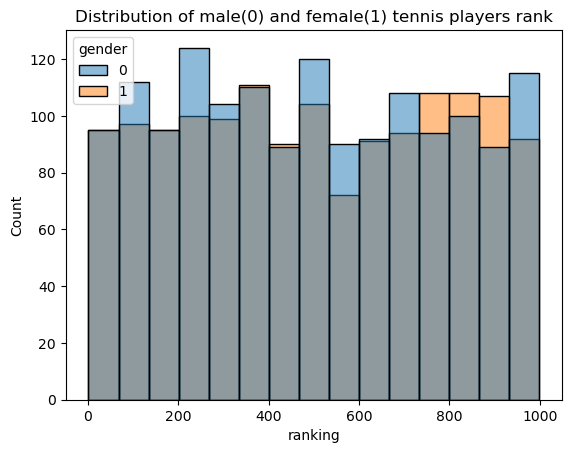

In [259]:
#plot a histogram for the distribution of male rankes and female ranks
sns.histplot(questions, x='ranking', hue='gender')
plt.title("Distribution of male(0) and female(1) tennis players rank")

In [266]:
#spearmanr ranks correlation
print("The spearman correlation is pretty low, showing no real correlation between the gender and the rank of an athlete:", \
      stats.spearmanr(questions.ranking, questions.gender)[0])

The spearman correlation is pretty low, showing no real correlation between the gender and the rank of an athlete: 0.014546355346192811


***
4. **/True or false:/** Assume that no variable other than `gender` and `ranking` can have any influence on the `similarity` of each question. Based on the analysis of the previous question, is the following statement **true** or **false**? Justify your answer. **"Ranking is not a worrisome confounder for the regression of Task 5.1."**

True. Because we saw in the previous question that the ranking distributions for men and women a really similar, the ranking does not play a cofounding role in the regression from Task 5.1. Women are asked more often questions unrelated to tennis than men, regardless of their ranking.